In [38]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [39]:
us_counties_df = pd.read_csv("us-counties.csv")

#convert date to pd.datetime
us_counties_df['date'] = pd.to_datetime(us_counties_df['date'])

In [40]:
us_counties_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [41]:
#group data by county
top_counties = us_counties_df[['date','county','state','cases','deaths']].groupby(['county', 'state'], as_index=False).max()

#sort grouped data by maximum case number in descending order
top_counties = top_counties.sort_values(by ='cases', axis=0, ascending=False).head(10)
top_counties = top_counties.reset_index()

#return the top 10 counties
top_counties

,index,county,state,date,cases,deaths
0,1756,Los Angeles,California,2021-10-03,1463743,26153.0
1,2115,New York City,New York,2021-10-03,1085590,34284.0
2,1830,Maricopa,Arizona,2021-10-03,700319,11558.0
3,1958,Miami-Dade,Florida,2021-10-03,661638,8504.0
4,650,Cook,Illinois,2021-10-03,620602,11603.0
5,1241,Harris,Texas,2021-10-03,558618,8414.0
6,736,Dallas,Texas,2021-10-03,389318,4931.0
7,2561,San Diego,California,2021-10-03,373289,4078.0
8,2490,Riverside,California,2021-10-03,363950,5004.0
9,2560,San Bernardino,California,2021-10-03,351963,5545.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [42]:
#group data by state
grouped_state = us_counties_df.groupby(['state'], as_index=False).max()

#sort grouped data by max case number in descending order
top_states = grouped_state.sort_values(by ='cases', ascending=False).head(5)
top_states = top_states.reset_index()

#return the top 5 states
top_states

,index,state,date,county,fips,cases,deaths
0,5,California,2021-10-03,Yuba,6115.0,1463743,26153.0
1,34,New York,2021-10-03,Yates,36123.0,1085590,34284.0
2,3,Arizona,2021-10-03,Yuma,4027.0,700319,11558.0
3,10,Florida,2021-10-03,Washington,12133.0,661638,11799.0
4,15,Illinois,2021-10-03,Woodford,17203.0,620602,11603.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [43]:
top_counties

,index,county,state,date,cases,deaths
0,1756,Los Angeles,California,2021-10-03,1463743,26153.0
1,2115,New York City,New York,2021-10-03,1085590,34284.0
2,1830,Maricopa,Arizona,2021-10-03,700319,11558.0
3,1958,Miami-Dade,Florida,2021-10-03,661638,8504.0
4,650,Cook,Illinois,2021-10-03,620602,11603.0
5,1241,Harris,Texas,2021-10-03,558618,8414.0
6,736,Dallas,Texas,2021-10-03,389318,4931.0
7,2561,San Diego,California,2021-10-03,373289,4078.0
8,2490,Riverside,California,2021-10-03,363950,5004.0
9,2560,San Bernardino,California,2021-10-03,351963,5545.0


In [44]:
#returns boolean for entries in the main county df that are also top counties in the same corresponding state
#stores in new df
top_incidence = us_counties_df[(us_counties_df['county'].isin(top_counties['county'])) & (us_counties_df['state'].isin(top_counties['state']))]

In [45]:
#function to calculate incidence
def calc_incidences(row, df):
    prev_index = (row.name[0], pd.to_datetime(row.name[1])-pd.offsets.Day(1))
    if prev_index in df.index: 
        return row['cases'] - df.loc[prev_index]['cases']
    else:
        return 0

#apply incidence calculation to top counties w/ incidences df
top_incidence = top_incidence.set_index(['county','date'])
top_incidence['incidence'] = top_incidence.apply(lambda x: calc_incidences(x,top_incidence),axis=1)

In [46]:
#verify
top_incidence = top_incidence.sort_values(by ='incidence', ascending=False)
top_incidence.head(15)

state     fips   cases   deaths  incidence
county        date                                                       
Los Angeles   2020-12-26  California   6037.0  706712   9438.0      29174
              2020-12-16  California   6037.0  566185   8568.0      22236
Miami-Dade    2021-08-13     Florida  12086.0  583845   6472.0      21655
              2021-08-20     Florida  12086.0  603878   6472.0      20033
Los Angeles   2021-01-01  California   6037.0  790895  10552.0      19980
Miami-Dade    2021-08-06     Florida  12086.0  562190   6472.0      19709
Los Angeles   2021-01-07  California   6037.0  871749  11545.0      19239
              2021-01-08  California   6037.0  889787  11863.0      18038
              2021-01-14  California   6037.0  975693  13234.0      16802
              2021-01-09  California   6037.0  906554  12084.0      16767
New York City 2021-03-24    New York      NaN  816580  30793.0      16715
Miami-Dade    2021-08-27     Florida  12086.0  620499   6472.0      16621
Los Angeles   2020-12-23  California   6037.0  664193   9153.0      16427
              2020-12-18  California   6037.0  596910   8757.0      16405
              2021-01-02  California   6037.0  806523  10682.0      15628

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [47]:
top_incidence = top_incidence.reset_index()

#group incidences in counties by max incidence
peaks_df = top_incidence.iloc[top_incidence.groupby('county')['incidence'].idxmax()]
peaks_df = peaks_df.set_index('county')

#sort values by incidences
peaks_df = peaks_df.sort_values(by = 'incidence', ascending= False)
peaks_df.head(10)

,date,state,fips,cases,deaths,incidence
county,,,,,,
Los Angeles,2020-12-26,California,6037.0,706712,9438.0,29174
Miami-Dade,2021-08-13,Florida,12086.0,583845,6472.0,21655
New York City,2021-03-24,New York,NaN,816580,30793.0,16715
San Diego,2021-07-01,California,6073.0,298015,3780.0,15453
Harris,2020-09-21,Texas,48201.0,137946,2505.0,14129
Maricopa,2021-01-03,Arizona,4013.0,342994,5239.0,11761
Riverside,2021-01-12,California,6065.0,227827,2294.0,8341
San Bernardino,2020-12-16,California,6071.0,137548,1304.0,8026
Cook,2020-11-01,Illinois,17031.0,193102,5500.0,6697


#### Question 5: Plot an incidence curve for the County with the highest peak.

Text(0, 0.5, 'incidences')

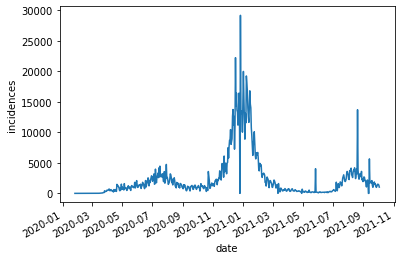

In [48]:
#county with highest peak: LA
top_incidence = top_incidence.set_index(['county','date'])
LA_incidence = top_incidence.loc['Los Angeles']['incidence'].plot()
LA_incidence.set_ylabel('incidences')

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

Text(0, 0.5, 'incidences')

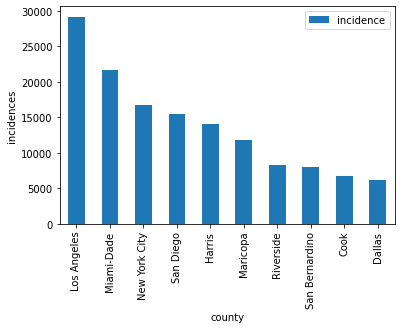

In [49]:
#county on x-axis and peak incidence on y axis
peaks_df = peaks_df.head(10)
peaks_incidence = peaks_df[['incidence']].plot.bar()
peaks_incidence.set_ylabel('incidences')